# VIDUS troubleshooting
## chr22 MAF comparison (With flip file)
Compare the MAF between my data and Nathan's data.

In [ ]:
cd /shared/jmarks/heroin/vidus/genotype/observed/processing/troubleshooting

aws s3 cp s3://rti-midas-data/studies/vidus/observed/processing/vidus.no_controls.plus.fam nates
aws s3 cp s3://rti-midas-data/studies/vidus/observed/processing/vidus.no_controls.plus.bim nates
aws s3 cp s3://rti-midas-data/studies/vidus/observed/processing/vidus.no_controls.plus.bed nates
    

# copy data over from previous analysis where I did not use a flip file
cd /shared/jmarks/heroin/vidus/genotype/observed/processing/troubleshooting/mine/with_flipfile
ln -s /shared/jmarks/heroin/vidus/genotype/observed/processing/004/prestructure/autosomes/* . 


# break out chr22 for my data
cd /shared/jmarks/heroin/vidus/genotype/observed/processing/troubleshooting/mine/no_flipfile
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 4000 \
    --bfile  vidus.dbsnp138.b37\
    --freq \
    --chr 22 \
    --make-bed \
    --out vidus_my_chr22
    
    
# break out chr22 for nates data
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 4000 \
    --bfile  vidus.no_controls.plus\
    --freq \
    --chr 22 \
    --make-bed \
    --out vidus_nates_chr22

In [ ]:
# local machine #
cd /cygdrive/c/Users/jmarks/Desktop/Projects/HIV/vidus/troubleshooting/maf/002

scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/vidus/genotype/observed/processing/troubleshooting/*/*frq . 
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/vidus/genotype/observed/processing/troubleshooting/mine/with*/*frq .
    
# get intersection
tail -n +2 vidus_my_chr22.frq | awk '{print $2}' > my_chr22_rsids.txt
tail -n +2 vidus_nates_chr22.frq | awk '{print $2}' > nates_chr22_rsids.txt

comm -12 <(sort my_chr22_rsids.txt) <(sort nates_chr22_rsids.txt) > intersection_chr22
awk '(NR==FNR){map[$1]= 0; next} { if ( $2 in map) {print $0}} ' intersection_chr22 vidus_my_chr22.frq >  vidus_my_intersection.frq
awk '(NR==FNR){map[$1]= 0; next} { if ( $2 in map) {print $0}} ' intersection_chr22 vidus_nates_chr22.frq >  vidus_nates_intersection.frq


In [ ]:
setwd('/Users/jmarks/OneDrive - Research Triangle Institute/Projects/HIV/vidus/troubleshooting/maf/003/')
my_table = read.table("vidus_my_intersection.frq")
nates_table = read.table("vidus_nates_intersection.frq")


title = "MAF chr22 comparison: same flipping approach (with flip file)"
my_xlab = "jesse_maf"
my_ylab = "nathan_maf"
plot(my_table$V5, nates_table$V5, main=title, xlab = my_xlab, ylab = my_ylab)

## MAF of 25000 SNPs

In [ ]:
## freq of nathans data ##
cd /shared/jmarks/heroin/vidus/genotype/observed/processing/004/troubleshooting/nathans
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 4000 \
    --bfile vidus.no_controls.plus \
    --freq \
    --extract 25000_random_snps \
    --out vidus.no_controls.plus.25000_snps

## freq of my data (autosomes) ##
cd /shared/jmarks/heroin/vidus/genotype/observed/processing/004/troubleshooting/mine
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 4000 \
    --bfile vidus.dbsnp138.b37 \
    --freq \
    --extract 25000_random_snps \
    --out vidus.dbsnp138.b37.25000_snps

cd /shared/jmarks/heroin/vidus/genotype/observed/processing/004/troubleshooting/mine
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 4000 \
    --bfile ../../prestructure/genomewide/vidus.dbsnp138.b37 \
    --freq \
    --extract 25000_random_snps \
    --out vidus.dbsnp138.b37.25K_snps_gw


## chr22 MAF comparison (no flipfile)
compare the MAF of chr22 for Nathan's data and my data, whereas in my data I do not use the flip file suggested in Nathan's methods file.

In [ ]:
cd /shared/jmarks/heroin/vidus/genotype/observed/processing/troubleshooting

aws s3 cp s3://rti-midas-data/studies/vidus/observed/processing/vidus.no_controls.plus.fam nates
aws s3 cp s3://rti-midas-data/studies/vidus/observed/processing/vidus.no_controls.plus.bim nates
aws s3 cp s3://rti-midas-data/studies/vidus/observed/processing/vidus.no_controls.plus.bed nates
    

# copy data over from previous analysis where I did not use a flip file
cd /shared/jmarks/heroin/vidus/genotype/observed/processing/troubleshooting/mine/no_flipfile
ln -s ../../006/vidus.genotypes_b37_dbsnp138.plus.{bed,bim,fam} 


# break out chr22 for my data
cd /shared/jmarks/heroin/vidus/genotype/observed/processing/troubleshooting/mine/no_flipfile
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 4000 \
    --bfile  vidus.genotypes_b37_dbsnp138.plus\
    --freq \
    --chr 22 \
    --make-bed \
    --out vidus_my_chr22
    
    
# break out chr22 for nates data
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 4000 \
    --bfile  vidus.no_controls.plus\
    --freq \
    --chr 22 \
    --make-bed \
    --out vidus_nates_chr22

# A1 freq of chr22 SNPs

In [ ]:
cd /shared/jmarks/heroin/vidus/genotype/observed/processing/troubleshooting/a1freq

# copy nathans data
aws s3 cp s3://rti-midas-data/studies/vidus/observed/processing/vidus.no_controls.plus.fam nates/
aws s3 cp s3://rti-midas-data/studies/vidus/observed/processing/vidus.no_controls.plus.bim nates/
aws s3 cp s3://rti-midas-data/studies/vidus/observed/processing/vidus.no_controls.plus.bed nates/
    
# copy my data
ln -s /shared/jmarks/heroin/vidus/genotype/observed/processing/004/prestructure/autosomes/vidus.dbsnp138.b37.{bim,bed,fam} mine/


# break out chr22 for my data
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 4000 \
    --bfile  mine/vidus.dbsnp138.b37\
    --freq counts \
    --chr 22 \
    --make-bed \
    --out mine/vidus_my_chr22
    
# break out chr22 for nates data
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 4000 \
    --bfile  nates/vidus.no_controls.plus\
    --freq counts\
    --chr 22 \
    --make-bed \
    --out nates/vidus_nates_chr22

In [ ]:
## local ##
cd /cygdrive/c/Users/jmarks/Desktop/Projects/HIV/vidus/troubleshooting/a1freq
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/vidus/genotype/observed/processing/troubleshooting/a1freq/*/*counts .
    
## get intersection
tail -n +2 vidus_my_chr22.frq.counts | awk '{print $2}' > my_chr22_rsids.txt
tail -n +2 vidus_nates_chr22.frq.counts | awk '{print $2}' > nates_chr22_rsids.txt

comm -12 <(sort my_chr22_rsids.txt) <(sort nates_chr22_rsids.txt) > intersection_chr22
awk '(NR==FNR){map[$1]= 0; next} { if ( $2 in map) {print $0}} ' intersection_chr22 vidus_my_chr22.frq.counts>  vidus_my_intersection.frq.counts
awk '(NR==FNR){map[$1]= 0; next} { if ( $2 in map) {print $0}} ' intersection_chr22 vidus_nates_chr22.frq.counts >  vidus_nates_intersection.frq.counts

## calculate A1 freq and append
awk '{tmp = $5/($5+$6)} {print tmp}' vidus_nates_intersection.frq.counts > nates_a1_freq
awk '{tmp = $5/($5+$6)} {print tmp}' vidus_my_intersection.frq.counts > my_a1_freq

Text(0,0.5,'Nathan A1')

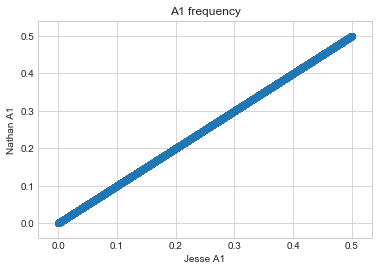

In [55]:
## Python ##
import os
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib 
#plt.style.use('seaborn-whitegrid')

os.chdir('/Users/jmarks/OneDrive - Research Triangle Institute/Projects/HIV/vidus/troubleshooting/a1freq/')

mine = "my_a1_freq"
nates = "nates_a1_freq"

#with open(mine) as myF, open(nates) as nF:

mydf = pd.read_table(mine, header=None)    
ndf = pd.read_table(nates, header=None)    

#fig = plt.figure()
#ax = plt.axes()

x = mydf[0]
y = ndf[0]


plt.scatter(x=x, y=y)
plt.title("A1 frequency")
plt.xlabel("Jesse A1")
plt.ylabel("Nathan A1")

In [71]:
mydf[mydf[0] > .49999]
mydf.loc[2569]


0    0.5
Name: 2569, dtype: float64

# PCA plot

In [ ]:
### PCA ###
base_dir=/shared/jmarks/heroin/vidus/genotype/observed/processing/troubleshooting/pca

## Generate list of SNPs in known high-LD regions ##
perl -lane 'if (($F[0]==5 && $F[3] >= 43964243 && $F[3] <= 51464243) || ($F[0]==6 && $F[3] >= 24892021 && $F[3] <= 33392022) || ($F[0]==8 && $F[3] >= 7962590 && $F[3] <= 11962591) || ($F[0]==11 && $F[3] >= 45043424 && $F[3] <= 57243424)) { print $F[1]."\n"; }' \
    ${base_dir}/vidus/vidus.dbsnp138.b37.bim  > ${base_dir}/vidus/high_ld_regions.remove


## Remove SNPs in known high-LD regions ##
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --bfile ${base_dir}/vidus/vidus.dbsnp138.b37 \
    --exclude ${base_dir}/vidus/high_ld_regions.remove \
    --make-bed \
    --out ${base_dir}/vidus/vidus.dbsnp138.b37.high_ld


## LD prune per chromosome ##
for chr in {1..23}; do
    sh /shared/bioinformatics/software/scripts/qsub_job.sh \
        --job_name vidus_ld_prune \
        --script_prefix ${base_dir}/vidus/${chr}_ld_prune \
        --mem 3.5 \
        --nslots 1 \
        --priority 0 \
        --program /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
            --noweb \
            --memory 3500 \
            --bfile ${base_dir}/vidus/vidus.dbsnp138.b37.high_ld \
            --indep-pairwise 1500 150 0.2 \
            --chr ${chr} \
            --out ${base_dir}/vidus/chr${chr}.ld_pruned
done



## Create LD pruned PLINK file sets ##
# Merge *prune.in files
cat ${base_dir}/vidus/chr*.ld_pruned.prune.in > \
    ${base_dir}/vidus/chr_all.ld_pruned.prune.in

# Create new PLINK filesets with only ld pruned variants
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile  ${base_dir}/vidus/vidus.dbsnp138.b37.high_ld \
    --extract ${base_dir}/vidus/chr_all.ld_pruned.prune.in \
    --make-bed \
    --out ${base_dir}/vidus/vidus.dbsnp138.b37.high_ld.ld_pruned
# "125614 variants and 994 people pass filters and QC."

## Clean up
rm ${base_dir}/vidus/*ld_pruned.{prune.in,prune.out,log}
rm ${base_dir}/vidus/*qsub*
rm ${base_dir}/vidus/*high_ld_regions*
rm ${base_dir}/vidus/*nosex


## Get sorted list of all VIDUS ld_pruned variants
cut -f2 ${base_dir}/vidus/vidus.dbsnp138.b37.high_ld.ld_pruned.bim |\
    sort > ${base_dir}/vidus/vidus.pruned_variant_ids.sorted

## Get sorted list of all 1000G variants
/shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name chr${chr}_filter \
    --script_prefix ancestry_partition_chr${chr} \
    --mem 8 \
    --priority 0 \
    --program "cat /shared/data/ref_panels/1000G/2013.05/plink/ALL.chr{1..22}.bim | cut -f2 |
    grep rs | sort > ${base_dir}/1000g/1000g.all_variant_ids.sorted "

## get 1000g vidus overlap
/shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name  Kg.vidus.overlap\
    --script_prefix ${base_dir}/vidus.1000g.overlap \
    --mem 8 \
    --priority 0 \
    --program "comm -12 ${base_dir}/vidus/vidus.pruned_variant_ids.sorted \
           ${base_dir}/1000g/1000g.all_variant_ids.sorted > ${base_dir}/vidus.1000g.overlap.variants"

## create 1000g binary filesets with ld pruned snps
for chr in {1..22}; do
    /shared/bioinformatics/software/scripts/qsub_job.sh \
        --job_name chr${chr}_filter \
        --script_prefix ${base_dir}/1000g/1000g.ld_pruned \
        --mem 8 \
        --priority 0 \
        --program /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink  \
            --noweb \
            --memory 10000 \
            --bfile /shared/data/ref_panels/1000G/2013.05/plink/ALL.chr${chr} \
            --extract ${base_dir}/vidus.1000g.overlap.variants \
            --make-bed \
            --out ${base_dir}/1000g/1000g.chr$chr.ld_pruned
done


## merge 1000g ld_pruned autosomes
touch ${base_dir}/1000g/autosome_merge_list.txt
for chr in {1..22};do
   echo "${base_dir}/1000g/1000g.chr${chr}.ld_pruned" >> ${base_dir}/1000g/autosome_merge_list.txt
done

/shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name merge_plink_filesets \
    --script_prefix merge_plink_filesets \
    --mem 4 \
    --priority 0 \
    --program /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
        --noweb \
        --memory 4000 \
        --merge-list ${base_dir}/1000g/autosome_merge_list.txt \
        --snps-only just-acgt \
        --make-bed \
        --out ${base_dir}/1000g/1000g.chr_all.ld_pruned





## combine 1000G and VIDUS
mkdir ${base_dir}/combined

## filter study data to the variants that overlap with 1000g
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile ${base_dir}/vidus/vidus.dbsnp138.b37.high_ld.ld_pruned \
    --extract ${base_dir}/vidus.1000g.overlap.variants \
    --make-bed \
    --out ${base_dir}/vidus/vidus.dbsnp138.b37.high_ld.ld_pruned.1000g_overlap

## Attempt merge 1000g with study data
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 4000 \
    --bfile ${base_dir}/1000g/1000g.chr_all.ld_pruned \
    --bmerge ${base_dir}/vidus/vidus.dbsnp138.b37.high_ld.ld_pruned.1000g_overlap \
    --snps-only just-acgt \
    --make-bed \
    --out ${base_dir}/combined/vidus.1000g.ld_pruned.merged
# "Error: 38 variants with 3+ alleles present."


## Exclude ambiguous snps (polymorphic) from study data
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile ${base_dir}/vidus/vidus.dbsnp138.b37.high_ld.ld_pruned \
    --exclude ${base_dir}/combined/vidus.1000g.ld_pruned.merged-merge.missnp \
    --make-bed \
    --out ${base_dir}/vidus/vidus.dbsnp138.b37.high_ld.ld_pruned.removed_poly

## Exclude ambiguous snps (polymorphic) from 1000g data
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile ${base_dir}/1000g/1000g.chr_all.ld_pruned \
    --exclude ${base_dir}/combined/vidus.1000g.ld_pruned.merged-merge.missnp \
    --make-bed \
    --out ${base_dir}/1000g/1000g.chr_all.ld_pruned.removed_poly

## Reattempt merge 1000g with study data.
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 4000 \
    --bfile ${base_dir}/1000g/1000g.chr_all.ld_pruned.removed_poly \
    --bmerge ${base_dir}/vidus/vidus.dbsnp138.b37.high_ld.ld_pruned.removed_poly \
    --snps-only just-acgt \
    --make-bed \
    --out ${base_dir}/combined/vidus.1000g.ld_pruned.merged.removed_poly
# No issues

## Get 1000G superpopulation subject IDs by ancestry
awk 'BEGIN { FS="\t"; OFS="\t" } { if($7=="African"){print $1} }'  /shared/data/ref_panels/1000G/2013.05/igsr_samples.tsv \
    > ${base_dir}/combined/1000g_subject_IDs.AFR
awk 'BEGIN { FS="\t"; OFS="\t" } { if($7=="East Asian"){print $1} }'  /shared/data/ref_panels/1000G/2013.05/igsr_samples.tsv \
    > ${base_dir}/combined/1000g_subject_IDs.EAS
awk 'BEGIN { FS="\t"; OFS="\t" } { if($7=="European"){print $1} }' /shared/data/ref_panels/1000G/2013.05/igsr_samples.tsv \
    > ${base_dir}/combined/1000g_subject_IDs.EUR


## Rename subject IDs if they are too long
awk '{ if(length($1)+length($2)>39){print $2} }' ${base_dir}/combined/vidus.1000g.ld_pruned.merged.removed_poly.fam | wc -l
# 994, therefore we will rename the IDs

awk '{$1="ID_"NR; print $0}' ${base_dir}/combined/vidus.1000g.ld_pruned.merged.removed_poly.fam >\
    tail ${base_dir}/combined/vidus.1000g.ld_pruned.merged.removed_poly.renamed.fam

awk '{ if(length($1)+length($2)>39){print $2} }' ${base_dir}/combined/vidus.1000g.ld_pruned.merged.removed_poly.renamed.fam | wc -l
# 0





## Run smartpca ##
mkdir ${base_dir}/results

sh /shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name vidus.1KG.martpca \
    --script_prefix ${base_dir}/results/smartpca \
    --mem 13.5 \
    --nslots 1 \
    --priority 0 \
    --program /shared/bioinformatics/software/third_party/EIG-6.1.4/bin/smartpca.perl \
        -i ${base_dir}/combined/vidus.1000g.ld_pruned.merged.removed_poly.bed \
        -a ${base_dir}/combined/vidus.1000g.ld_pruned.merged.removed_poly.bim \
        -b ${base_dir}/combined/vidus.1000g.ld_pruned.merged.removed_poly.renamed.fam \
        -o ${base_dir}/results/vidus.1000g.ld_pruned.pca \
        -p ${base_dir}/results/vidus.1000g.ld_pruned.plot \
        -e ${base_dir}/results/vidus.1000g.ld_pruned.eval \
        -l ${base_dir}/results/vidus.1000g.ld_pruned.pca.log \
        -m 0

cut -d " " -f1 vidus.dbsnp138.b37.high_ld.ld_pruned.removed_poly.fam > vidus.fam_ids

grep -f vidus.fam_ids vidus.1000g.ld_pruned.pca.evec > vidus.1000g.ld_pruned.pca.evec.VIDUS
grep -f 1000g_subject_IDs.EUR vidus.1000g.ld_pruned.pca.evec > vidus.1000g.ld_pruned.pca.evec.EUR
grep -f 1000g_subject_IDs.EAS vidus.1000g.ld_pruned.pca.evec > vidus.1000g.ld_pruned.pca.evec.EAS
grep -f 1000g_subject_IDs.AFR vidus.1000g.ld_pruned.pca.evec > vidus.1000g.ld_pruned.pca.evec.AFR

### PCA plot in python

In [1]:
import pandas as pd
import matplotlib.pyplot as mpl

import os

os.chdir("/Users/jmarks/OneDrive - Research Triangle Institute/Projects//HIV/vidus/troubleshooting/pca/")


#afr = pd.read_csv("vidus.1000g.ld_pruned.pca.evec.AFR", header=None, index_col=0, sep='\s+')
#vidus = pd.read_csv("vidus.1000g.ld_pruned.pca.evec.VIDUS", header=None, index_col=0, sep='\s+')
#afr.columns = ["PC{}".format(i) for i in range(1, 12)]
#vidus.columns = ["PC{}".format(i) for i in range(1, 12)]
#afr.index.name = "subjects"
#vidus.index.name = "subjects"

def read_evec(file):
    df = pd.read_csv(file, header=None, index_col=0, sep='\s+')
    df.columns = ["PC{}".format(i) for i in range(1, 12)]
    df.index.name = "subjects"
    return df

def plot_pc(pc1, pc2, df, group, color):
    mpl.scatter(x=df[pc1], y=df[pc2], color=color, label=group)
    mpl.legend()
    mpl.xlabel(pc1)
    mpl.ylabel(pc2)


def multi_plot(plot_num, pc1, pc2):
    mpl.figure(plot_num)
    plot_pc(pc1, pc2, vidus, "VIDUS", "black")
    plot_pc(pc1, pc2, afr, "AFR", "purple")
    plot_pc(pc1, pc2, eas, "eas", "orange")
    plot_pc(pc1, pc2, eur, "EUR", "green")
    
################################################################################
afr = read_evec(file="vidus.1000g.ld_pruned.pca.evec.AFR")
vidus = read_evec(file="vidus.1000g.ld_pruned.pca.evec.VIDUS")
eas = read_evec(file="vidus.1000g.ld_pruned.pca.evec.EAS")
eur = read_evec(file="vidus.1000g.ld_pruned.pca.evec.EUR")

print(vidus.tail())


#plot_pc("PC1", "PC2", vidus, "VIDUS", "black")
#plot_pc("PC1", "PC2", afr, "AFR", "purple")
#plot_pc("PC1", "PC2", eas, "eas", "orange")
#plot_pc("PC1", "PC2", eur, "EUR", "green")

pc1 = "PC1"
pc2 = "PC2"


for pc in range(1,11):
    pc1= "PC{}".format(pc)
    multi_plot(plot_num=pc, pc1=pc1, pc2=pc2)

                                        PC1     PC2     PC3     PC4     PC5  \
subjects                                                                      
ID_990:8015124438_NA0055295_93-0634  0.0108  0.0136  0.0044  0.0066  0.0004   
ID_991:8015124439_NA0055328_93-0648  0.0102  0.0138  0.0053  0.0074  0.0002   
ID_992:8015124440_NA0054616_93-0435 -0.0227  0.0059  0.0019  0.0031  0.0006   
ID_993:8015124441_NA0054095_93-0116  0.0105  0.0137  0.0051  0.0071 -0.0001   
ID_994:8015124442_NA0054094_93-0115  0.0109  0.0135  0.0053  0.0063 -0.0023   

                                        PC6     PC7     PC8     PC9    PC10  \
subjects                                                                      
ID_990:8015124438_NA0055295_93-0634  0.0034  0.0179  0.0050  0.0107  0.0036   
ID_991:8015124439_NA0055328_93-0648 -0.0009 -0.0002 -0.0003  0.0123  0.0019   
ID_992:8015124440_NA0054616_93-0435 -0.0078  0.0016 -0.0084 -0.0065 -0.0044   
ID_993:8015124441_NA0054095_93-0116 -0.0005 -0.0103

In [ ]:
%matplotlib notebook

<IPython.core.display.Javascript object>


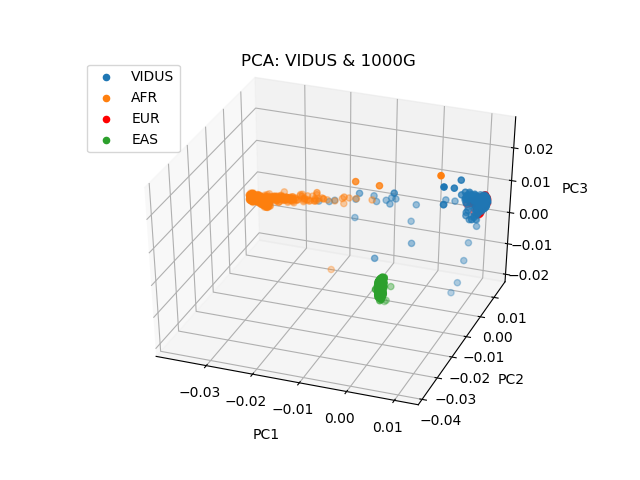

Text(0.5,0.92,'PCA: VIDUS & 1000G')

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()

pc1 = "PC1"
pc2 = "PC2"
pc3 = "PC3"

ax = fig.add_subplot(111, projection='3d')
x= vidus[pc1]
y= vidus[pc2]
z = vidus[pc3]
ax.scatter(x, y, z, label="VIDUS")


x= afr[pc1]
y= afr[pc2]
z = afr[pc3]
ax.scatter(x, y, z, label="AFR")


x= eur[pc1]
y= eur[pc2]
z = eur[pc3]
ax.scatter(x, y, z, color = "red", label="EUR")

x= eas[pc1]
y= eas[pc2]
z = eas[pc3]
ax.scatter(x, y, z, label="EAS")

ax.legend(loc=2)
ax.set_xlabel(pc1, labelpad=10)
ax.set_ylabel(pc2, labelpad=10)
ax.set_zlabel(pc3, labelpad=10)
plt.title("PCA: VIDUS & 1000G", pad=15)

#plt.show()
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)
#     plt.show()

### PCA plot in R

In [ ]:
## R ##
# Load data
options(stringsAsFactors=F)
setwd("/Users/jmarks/OneDrive - Research Triangle Institute/Projects/HIV/vidus/troubleshooting/pca/")

dspace <- read.table("vidus.1000g.ld_pruned.pca.evec", header=F, row.names=1)[1:10]
vidus <- read.table("vidus.1000g.ld_pruned.pca.evec.VIDUS", header=F, row.names=1)[1:10]
afr <- read.table("vidus.1000g.ld_pruned.pca.evec.AFR", header=F, row.names=1)[1:10]
eas <- read.table("vidus.1000g.ld_pruned.pca.evec.EAS", header=F, row.names=1)[1:10]
eur <- read.table("vidus.1000g.ld_pruned.pca.evec.EUR", header=F, row.names=1)[1:10]

head(dspace)
#head(vidus_dspace)
#head(eur_dspace)
#head(eas_dspace)
#head(afr)

In [ ]:
## R ##
# Function for plotting off-diagonal scatterplots
plot.offdiag <- function(x, y, colors=label.colors){
    #Make x and y axes equal
    limits <- c(min(x,y), max(x,y)) * 1.3
    par(usr = c(limits, limits))
    points(x,y, col=colors, pch=16)
}

# Function for plotting diagonal density plots
plot.diag <- function(x, colors=label.colors){
    d <- density(x, bw=0.01, kernel="gaussian")
    #Update plot axes limits
    par(usr = c(range(d$x), range(d$y)*1.3))
    points(d$x,d$y, type="l")
    #Add PC values
    points(x=x, y=jitter(rep(mean(d$y),times=d$n),factor=5), col=label.colors, pch=16)
}


#Color label samples
label.colors <- rep(NA, nrow(dspace))
label.colors[] <- rgb(40,20,30,100, maxColorValue=255) 
label.colors[1:994] <- rgb(0,80,190,100, maxColorValue=255) #blue, vidus
#label.colors[aa.ctrls] <- rgb(230,170,5,100, maxColorValue=255) #gold

options(repr.plot.width=8, repr.plot.height=8)
#Redefine outer margin
par(oma = c(4, 1, 2, 1))
pairs(x=dspace[,1:5], panel=plot.offdiag, diag.panel=plot.diag, 
      labels=paste0("PC",1:5), label.pos=0.9, cex.labels=1.8)
par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), mar=c(0, 0, 1.5, 0), new=TRUE)
plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n", main="UHS2-3 + Controls AA", cex.main=1)

#par(oma = c(4, 1, 2, 1))
#pairs(x=aa.dspace[,6:10], panel=plot.offdiag, diag.panel=plot.diag, 
#      labels=paste0("PC",6:10), label.pos=0.9, cex.labels=1.8)
#par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), mar=c(0, 0, 1.5, 0), new=TRUE)
#plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n", main="UHS2-3 + Controls AA", cex.main=1)
#
#
##Color label samples
#label.colors <- rep(NA, nrow(ea.dspace))
#label.colors[ea.cases] <- rgb(230,170,5,100, maxColorValue=255) #blue
#label.colors[ea.ctrls] <- rgb(0,80,190,100, maxColorValue=255) #blue
#which(is.na(label.colors))
#
#par(oma = c(4, 1, 2, 1))
#pairs(x=ea.dspace[,1:5], panel=plot.offdiag, diag.panel=plot.diag, 
#      labels=paste0("PC",1:5), label.pos=0.9, cex.labels=1.8)
#par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), mar=c(0, 0, 1.5, 0), new=TRUE)
#plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n", main="UHS2-3 + Controls EA", cex.main=1)
#
#par(oma = c(4, 1, 2, 1))
#pairs(x=ea.dspace[,6:10], panel=plot.offdiag, diag.panel=plot.diag, 
#      labels=paste0("PC",6:10), label.pos=0.9, cex.labels=1.8)
#par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), mar=c(0, 0, 1.5, 0), new=TRUE)
#plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n", main="UHS2-3 + Controls EA", cex.main=1)b

# Sandbox

In [ ]:
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 4000 \
    --bfile  vidus.no_controls.plus\
    --freq \
    --make-bed \
    --out vidus.no_controls.plus